In [4]:
import pandas as pd
clean_move_live_df_b_time_age_all = pd.read_csv('clean_move_live_df_b_time_age_all.csv')
clean_move_live_df_b_time_age_all = clean_move_live_df_b_time_age_all.set_index('법정동명')
clean_move_live_df_b_time_age_all

,법정동단위 거주인구,법정동 단위 생활인구수
법정동명,,
역삼동,73025.000000,4.930053e+06
개포동,50724.333333,1.331160e+06
청담동,25676.000000,1.339377e+06
삼성동,44186.000000,2.502723e+06
대치동,86436.333333,3.759405e+06
...,...,...
상봉동,44499.000000,1.345802e+06
중화동,44784.000000,1.261811e+06
묵동,53403.000000,1.355149e+06


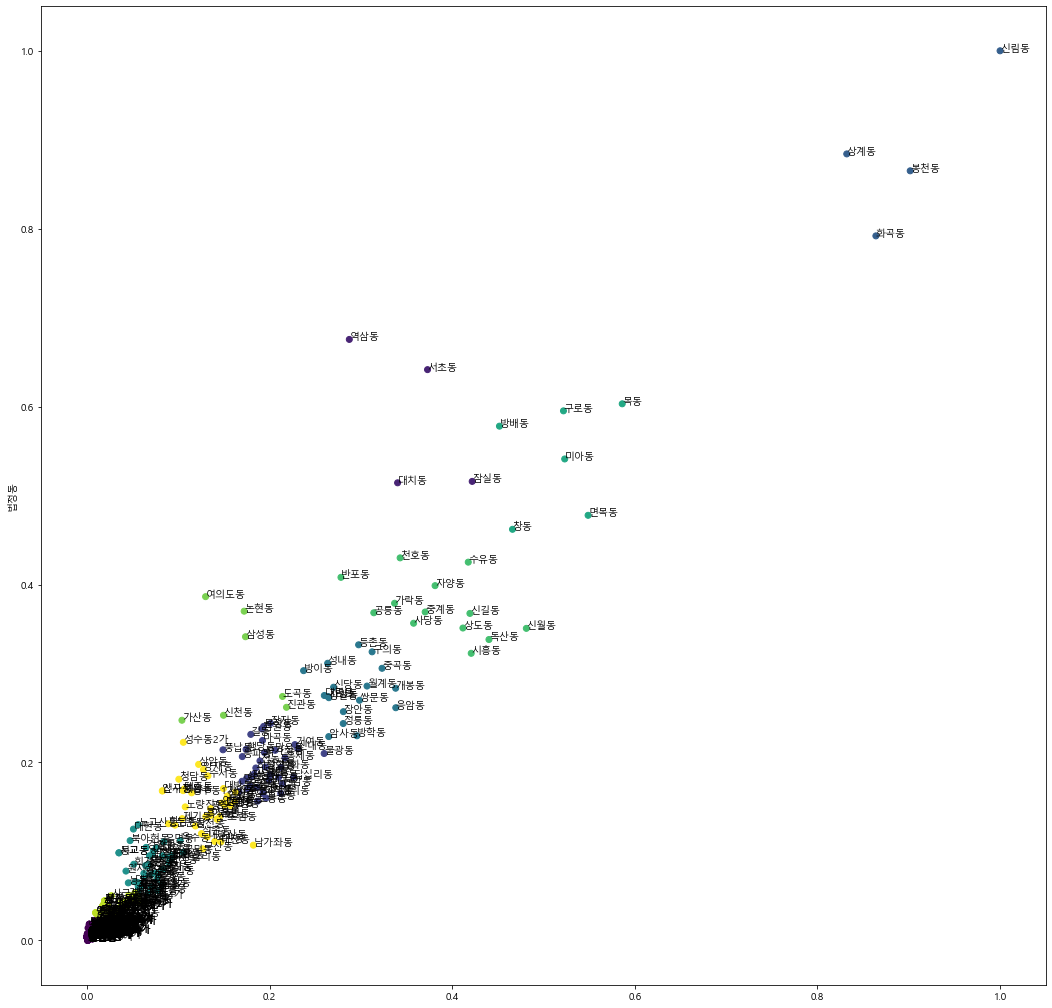

In [21]:

import warnings  
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False     # 마이너스 부호 깨짐 방지

# normalizer 생성
min_max_scaler = MinMaxScaler()

# 표준화하기
clean_move_live_df_b_time_age_all[['법정동단위 거주인구','법정동 단위 생활인구수']] = min_max_scaler.fit_transform(clean_move_live_df_b_time_age_all[['법정동단위 거주인구','법정동 단위 생활인구수']])


# 클러스터링 생성
estimator = KMeans(n_clusters = 11)
cluster_ids = estimator.fit_predict(clean_move_live_df_b_time_age_all)


# 플롯
plt.figure(figsize=(18,18))
plt.scatter(clean_move_live_df_b_time_age_all['법정동단위 거주인구'], clean_move_live_df_b_time_age_all['법정동 단위 생활인구수'], c=cluster_ids)
plt.xlabel("")
plt.ylabel("법정동")
plt.savefig('clustering.png')

# 범례 달기
for dong_p, live, move in clean_move_live_df_b_time_age_all.itertuples():
    plt.annotate(dong_p, (live, move))
plt.savefig('clustering.png')    
plt.show()


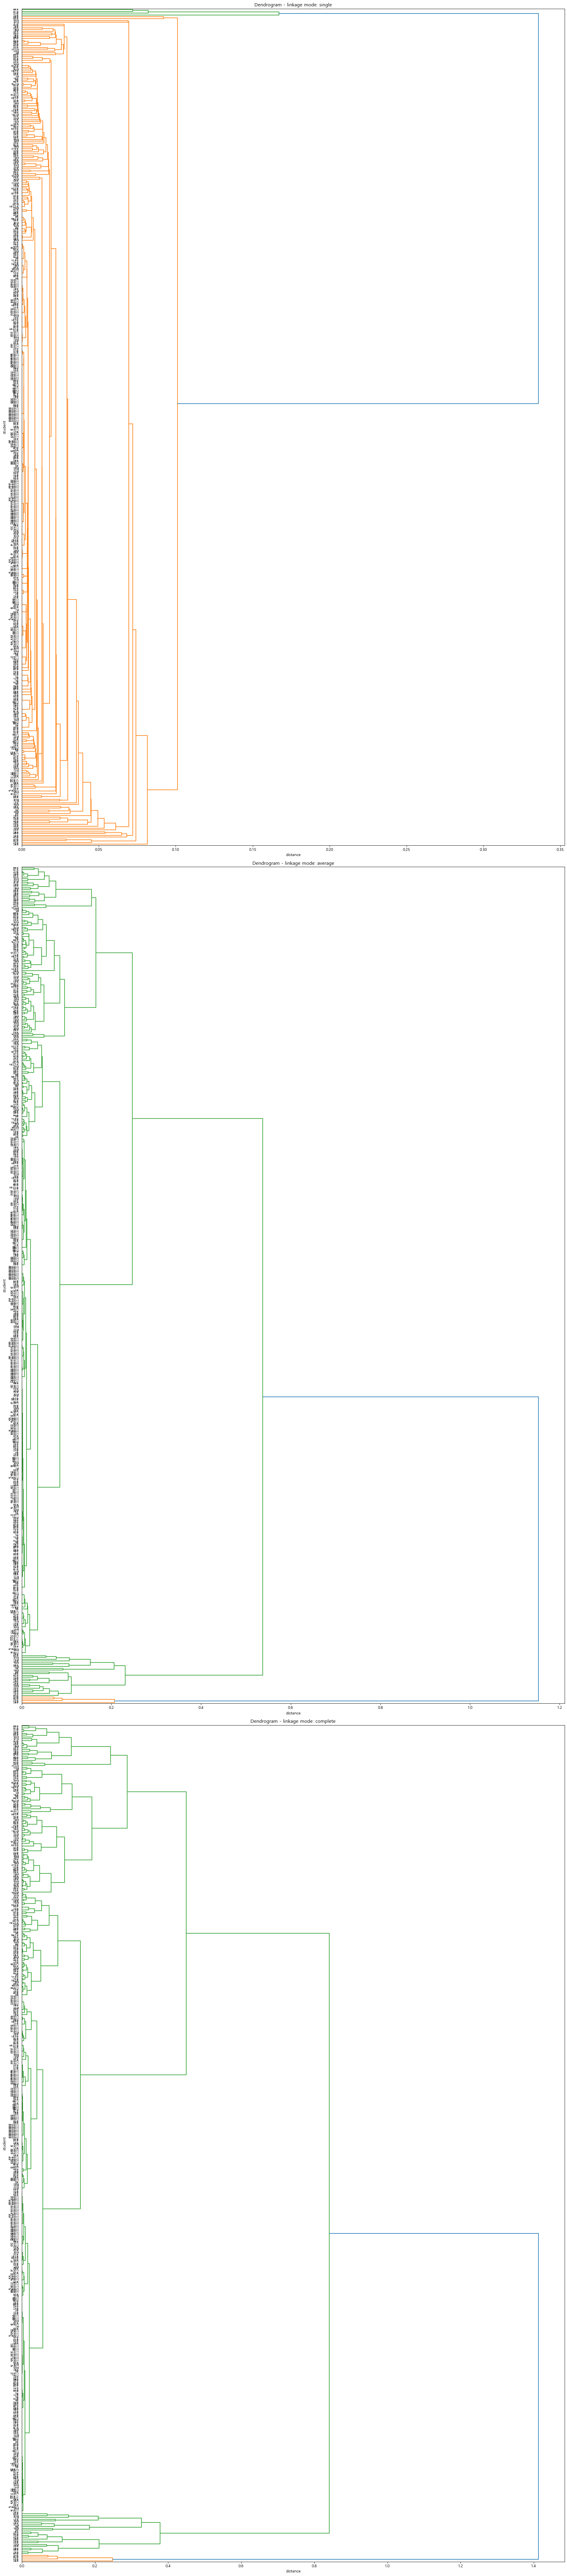

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram


# 최단연결법은 single, 평균연결법은 average, 최장연결법은 complete으로 표기한다.
modes = ['single', 'average', 'complete']

plt.figure(figsize=(20,120))

# subplot() 함수를 사용하여 서브 플롯을 추가하고 반환 값을 y_axis라는 변수에 할당
# sharey 매개 변수를 사용하여 서브 플롯에 대한 모든 호출에 이 변수를 전달하여 모든 플롯이 동일한 y 축 사용
# y_axis = None

# 모든 linkage mode 반복 생성
for i, mode in enumerate(modes):
    # 서브플롯 추가, y축은 공유
    y_axis = plt.subplot(4, 1, i + 1, sharey = y_axis)
    
    # 레이블링
    plt.title('Dendrogram - linkage mode: {}'.format(mode))
    plt.xlabel('distance')
    plt.ylabel('student')
    
    # 클러스터링
    clustering = linkage(clean_move_live_df_b_time_age_all[['법정동단위 거주인구', '법정동 단위 생활인구수']], mode)
    
    # 덴드로그램
    dendrogram(clustering, labels=list(clean_move_live_df_b_time_age_all.index), orientation='right')
    
plt.tight_layout()
plt.show()